# Description

It takes a GWAS on a random phenotype and verifies that the Manhattan and QQ-plots look fine (without inflation).

# Modules

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(qqman)



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





# Paths

In [3]:
DATA_DIR <- Sys.getenv("PHENOPLIER_DATA_DIR")

In [4]:
DATA_DIR

[1] "/opt/data/data"

In [5]:
A1000G_GENOTYPES_DIR <- Sys.getenv("PHENOPLIER_A1000G_GENOTYPES_DIR")

In [6]:
A1000G_GENOTYPES_DIR

[1] "/opt/data/data/1000g/genotypes"

In [7]:
SUBSETS_DIR <- file.path(A1000G_GENOTYPES_DIR, "subsets")

In [8]:
SUBSETS_DIR

[1] "/opt/data/data/1000g/genotypes/subsets"

In [9]:
GWAS_DIR <- file.path(A1000G_GENOTYPES_DIR, "gwas")

In [10]:
GWAS_DIR

[1] "/opt/data/data/1000g/genotypes/gwas"

# Random pheno 0

## Load data

In [11]:
gwas <- as.data.frame(read_table(file.path(GWAS_DIR, "random.pheno0.glm.linear")))


── Column specification ────────────────────────────────────────────────────────
cols(
  `#CHROM` = col_double(),
  POS = col_double(),
  ID = col_character(),
  REF = col_character(),
  ALT = col_character(),
  A1 = col_character(),
  TEST = col_character(),
  OBS_CT = col_double(),
  BETA = col_double(),
  SE = col_double(),
  L95 = col_double(),
  U95 = col_double(),
  T_STAT = col_double(),
  P = col_double(),
  ERRCODE = col_character()
)



In [12]:
dim(gwas)

[1] 5923554      15

In [13]:
head(gwas)

,#CHROM,POS,ID,REF,ALT,A1,TEST,OBS_CT,BETA,SE,L95,U95,T_STAT,P,ERRCODE
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,11008,rs575272151,C,G,G,ADD,312,-0.1059130,0.154626,-0.408974,0.197149,-0.684960,0.493918,.
2,1,11012,rs544419019,C,G,G,ADD,312,-0.1059130,0.154626,-0.408974,0.197149,-0.684960,0.493918,.
3,1,13110,rs540538026,G,A,A,ADD,312,-0.1005660,0.179485,-0.452351,0.251219,-0.560303,0.575707,.
4,1,13116,rs62635286,T,G,G,ADD,312,0.0252533,0.107234,-0.184922,0.235429,0.235496,0.813991,.
5,1,13118,rs200579949,A,G,G,ADD,312,0.0252533,0.107234,-0.184922,0.235429,0.235496,0.813991,.
6,1,13273,rs531730856,G,C,C,ADD,312,-0.0808900,0.116964,-0.310136,0.148356,-0.691578,0.489758,.


In [14]:
gwas <- gwas %>% filter(P >= 0 & P <= 1)

In [15]:
dim(gwas)

[1] 5923554      15

## Manhattan plot

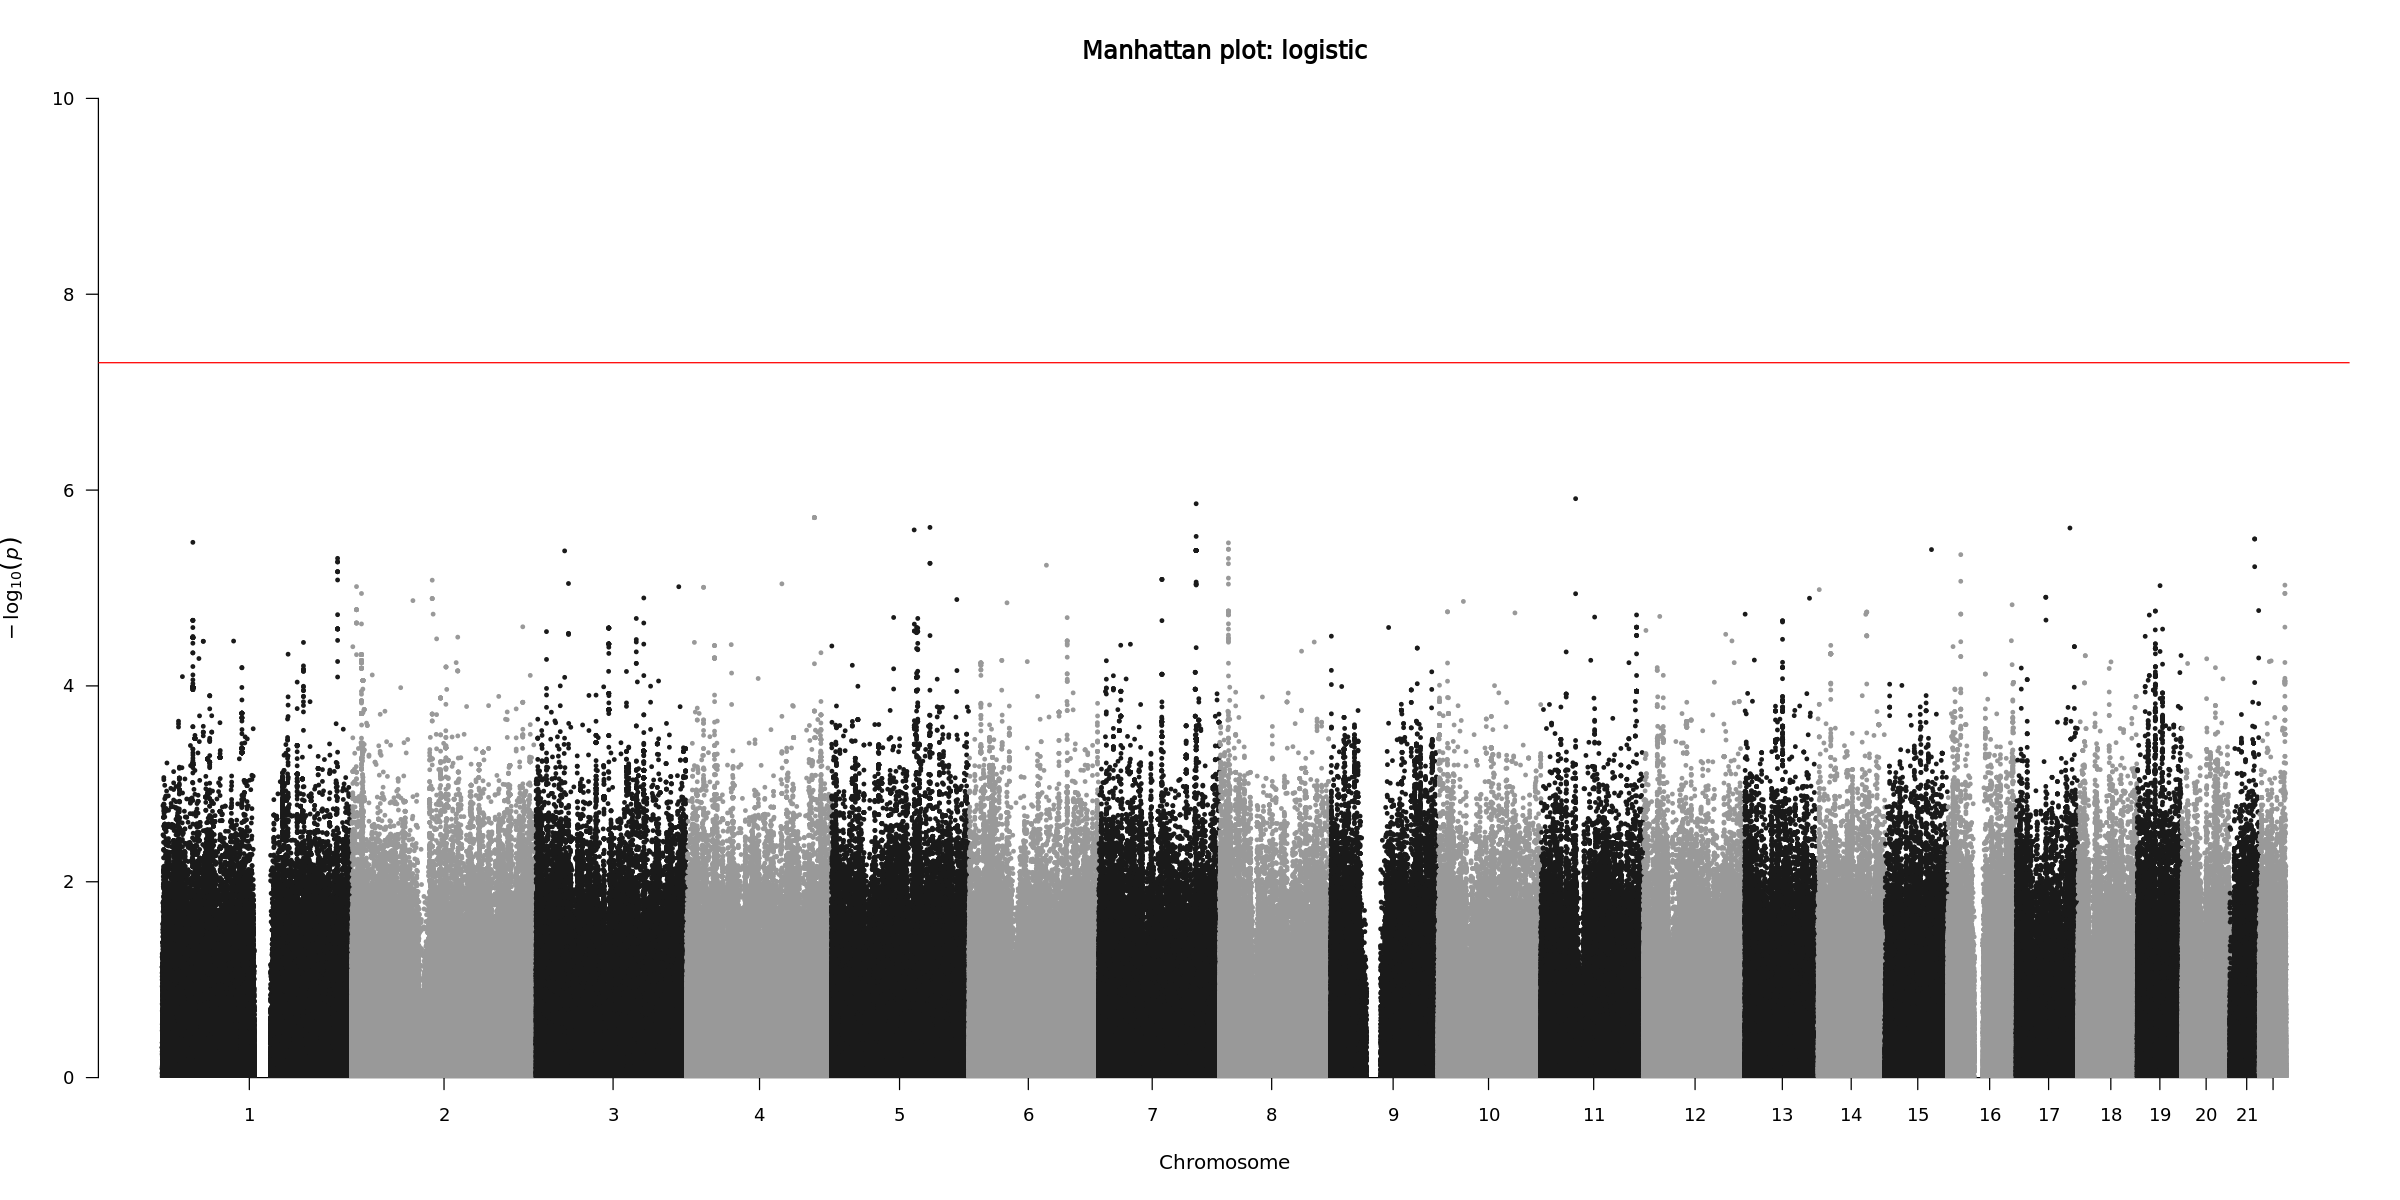

In [16]:
options(repr.plot.width=20, repr.plot.height=10)

manhattan(
    gwas,
    chr="#CHROM",
    bp="POS",
    p="P",
    snp="ID",
    main = "Manhattan plot: logistic",
    suggestiveline = F,
    genomewideline = -log10(5e-08),
    cex = 0.6,
    cex.axis = 0.9,
    ylim = c(0, 10),
)

## QQ-plot

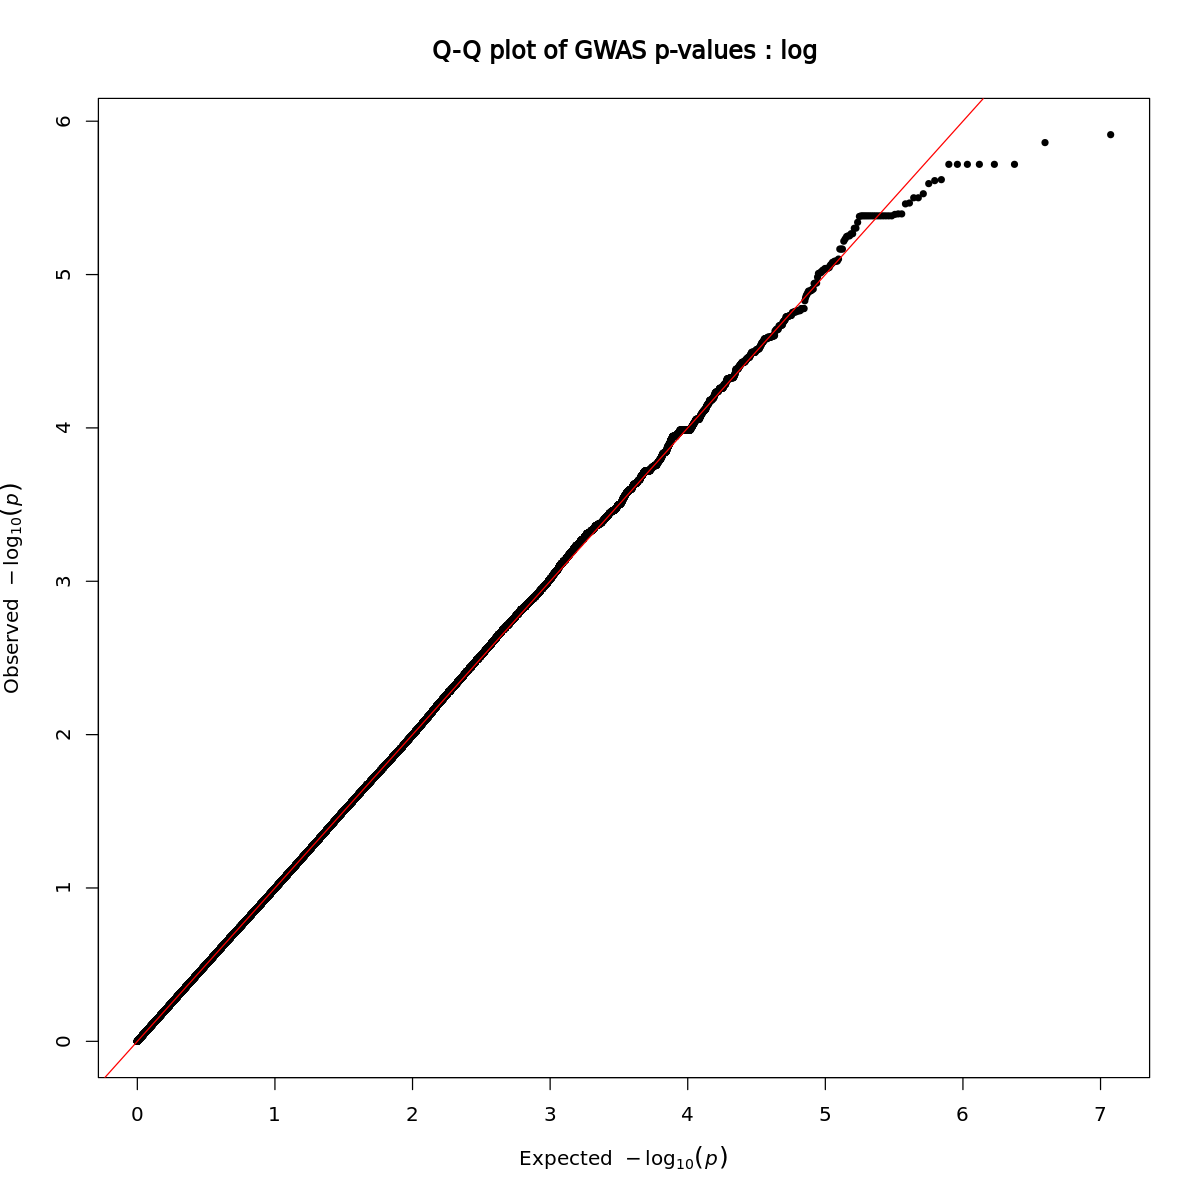

In [17]:
options(repr.plot.width=10, repr.plot.height=10)

qq(gwas$P, main = "Q-Q plot of GWAS p-values : log")

# Random pheno 28

Random phenotype 28 has the largest inflation factor (although within the acceptable limits).

## Load data

In [18]:
gwas <- as.data.frame(read_table(file.path(GWAS_DIR, "random.pheno28.glm.linear")))


── Column specification ────────────────────────────────────────────────────────
cols(
  `#CHROM` = col_double(),
  POS = col_double(),
  ID = col_character(),
  REF = col_character(),
  ALT = col_character(),
  A1 = col_character(),
  TEST = col_character(),
  OBS_CT = col_double(),
  BETA = col_double(),
  SE = col_double(),
  L95 = col_double(),
  U95 = col_double(),
  T_STAT = col_double(),
  P = col_double(),
  ERRCODE = col_character()
)



In [19]:
dim(gwas)

[1] 5923554      15

In [20]:
head(gwas)

,#CHROM,POS,ID,REF,ALT,A1,TEST,OBS_CT,BETA,SE,L95,U95,T_STAT,P,ERRCODE
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,11008,rs575272151,C,G,G,ADD,312,-0.0256139,0.153866,-0.32718700,0.275959,-0.1664680,0.8679050,.
2,1,11012,rs544419019,C,G,G,ADD,312,-0.0256139,0.153866,-0.32718700,0.275959,-0.1664680,0.8679050,.
3,1,13110,rs540538026,G,A,A,ADD,312,0.0171462,0.178561,-0.33282700,0.367120,0.0960243,0.9235680,.
4,1,13116,rs62635286,T,G,G,ADD,312,0.2010540,0.105979,-0.00665983,0.408769,1.8971200,0.0588085,.
5,1,13118,rs200579949,A,G,G,ADD,312,0.2010540,0.105979,-0.00665983,0.408769,1.8971200,0.0588085,.
6,1,13273,rs531730856,G,C,C,ADD,312,-0.0713757,0.116321,-0.29936100,0.156610,-0.6136070,0.5399570,.


In [21]:
gwas <- gwas %>% filter(P >= 0 & P <= 1)

In [22]:
dim(gwas)

[1] 5923554      15

## Manhattan plot

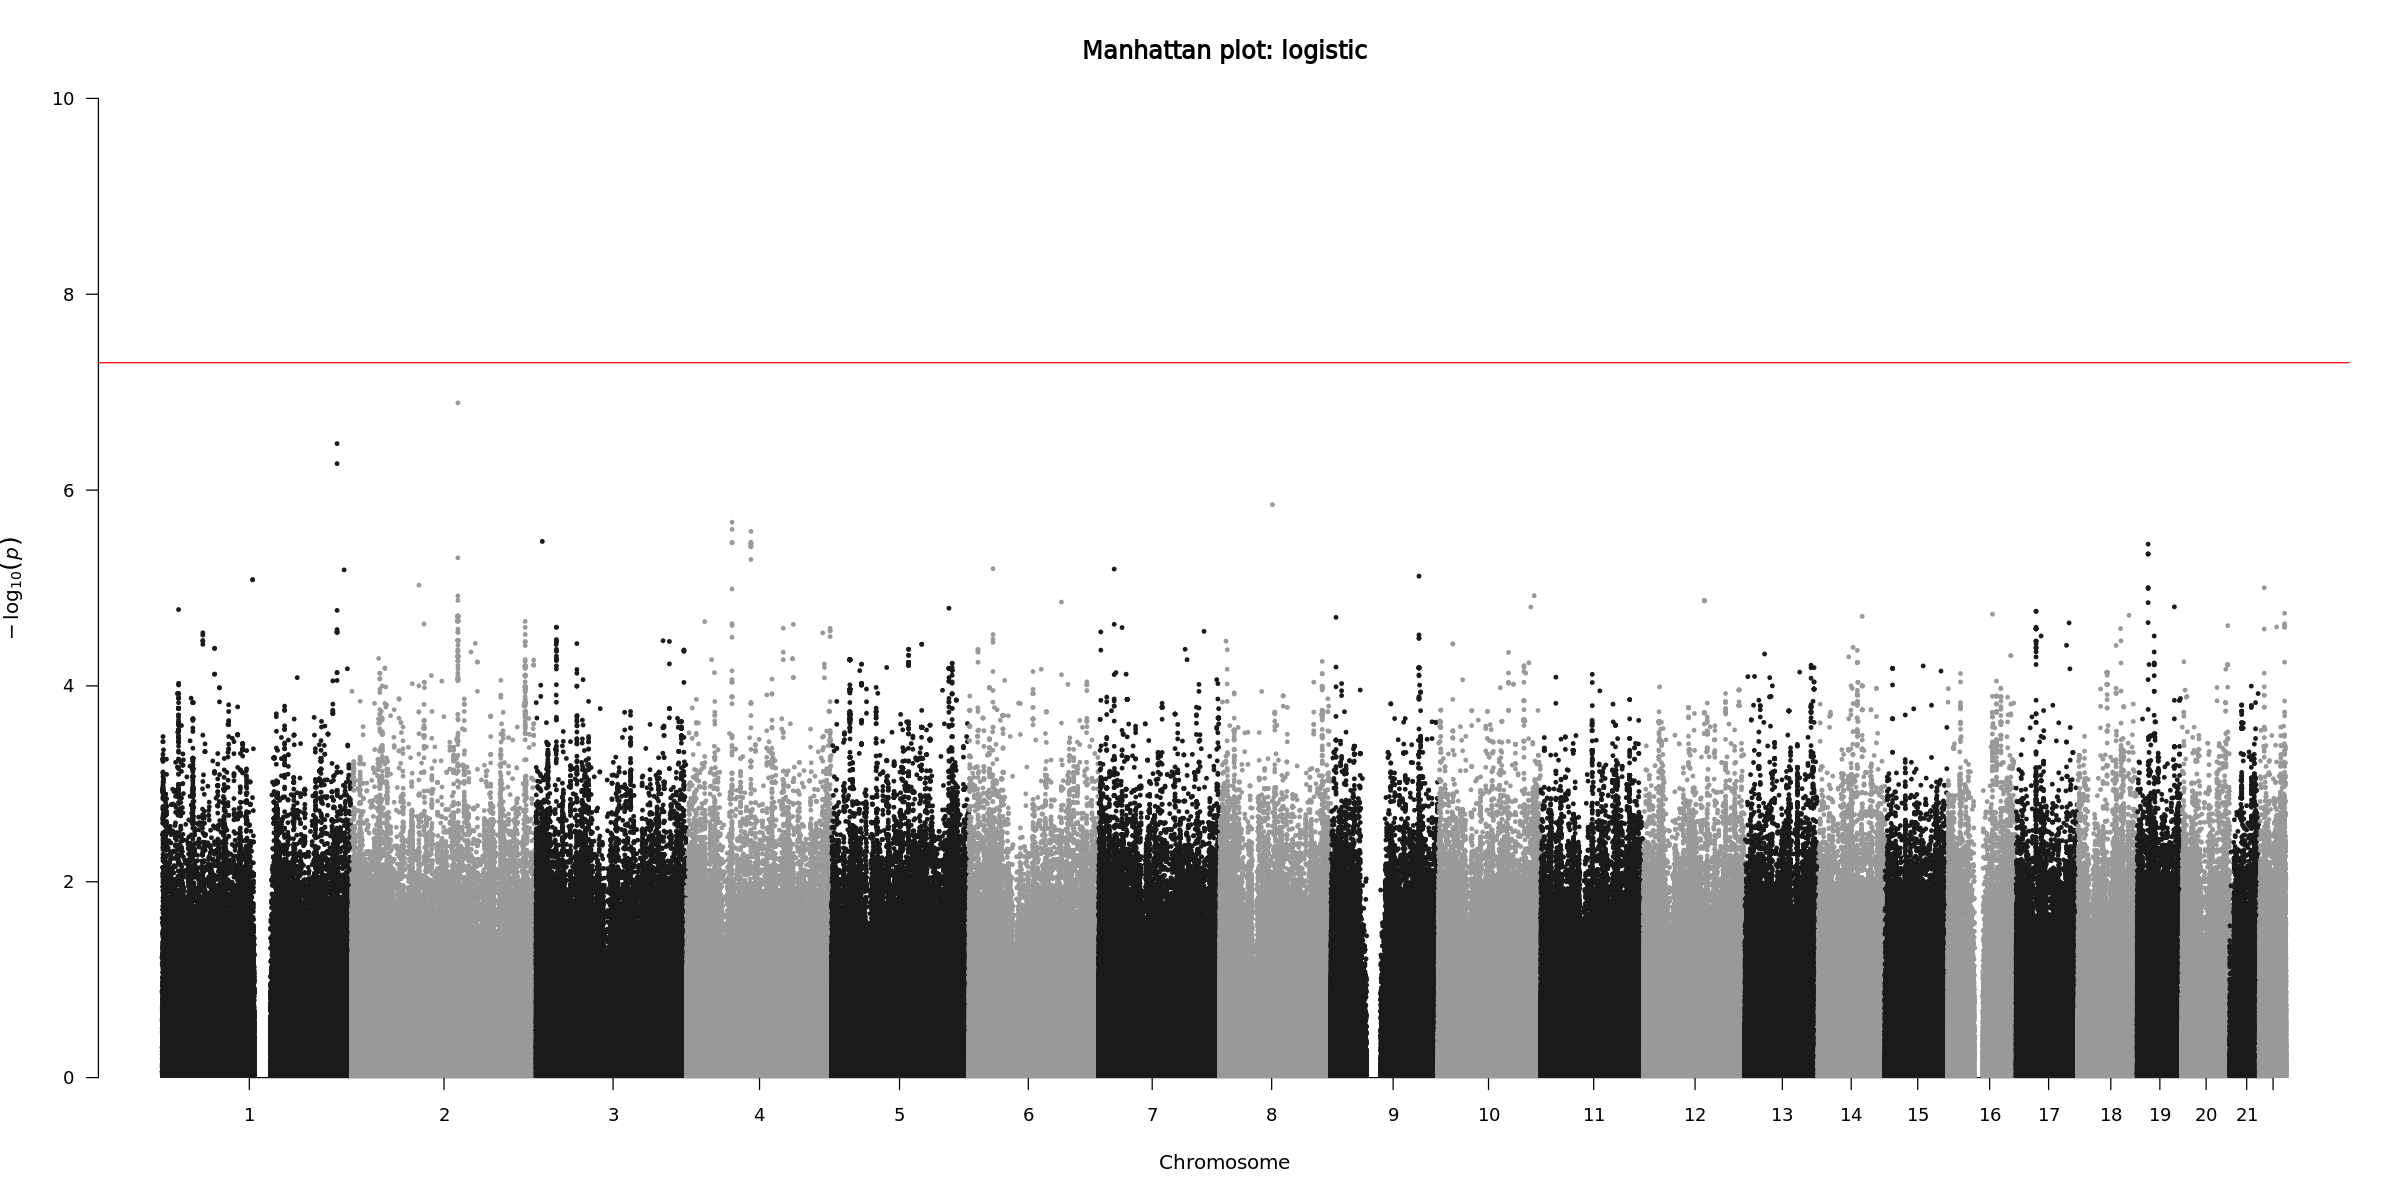

In [23]:
options(repr.plot.width=20, repr.plot.height=10)

manhattan(
    gwas,
    chr="#CHROM",
    bp="POS",
    p="P",
    snp="ID",
    main = "Manhattan plot: logistic",
    suggestiveline = F,
    genomewideline = -log10(5e-08),
    cex = 0.6,
    cex.axis = 0.9,
    ylim = c(0, 10),
)

## QQ-plot

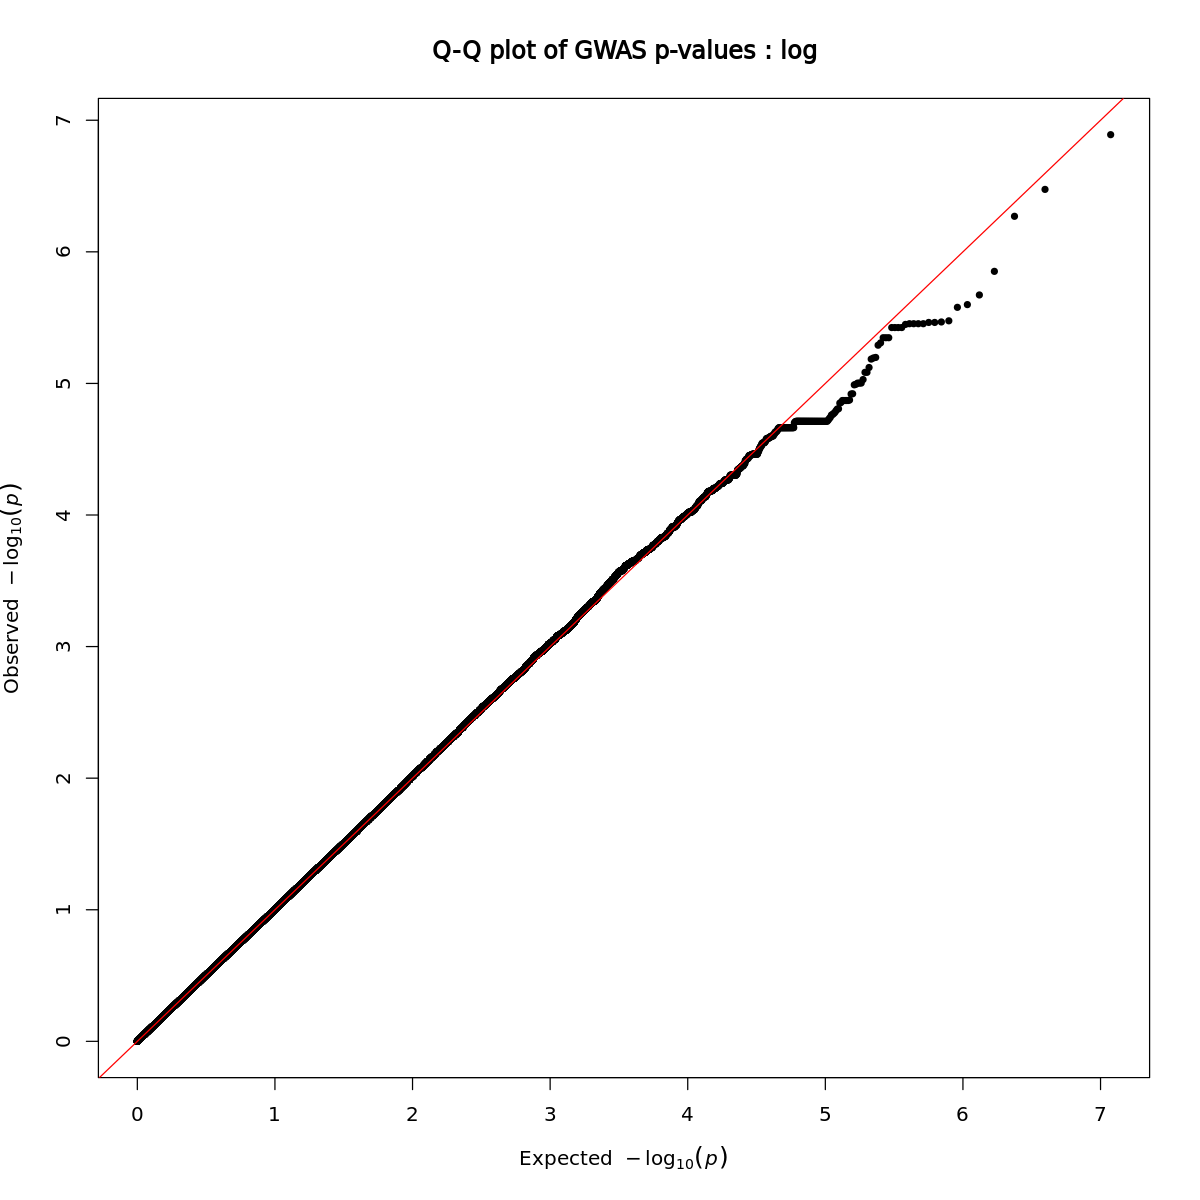

In [24]:
options(repr.plot.width=10, repr.plot.height=10)

qq(gwas$P, main = "Q-Q plot of GWAS p-values : log")